# Домашнее задание 6: классификация текстов

Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.shape

(4234042, 4)

Проверяем данные на пропуски

In [5]:
train.isna().any()

title            False
description       True
Category_name    False
Category         False
dtype: bool

In [6]:
train.fillna('', inplace=True)
train

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27
...,...,...,...,...
4234037,Мопед Дельта Мотоланд 70 кубиков,Продам новый мопед Дельта купленный 18 июня 20...,Мотоциклы и мототехника,14
4234038,Xiaomi A2 4/64 почти новый (б/у 3 дня),"Xiaomi A2 версия 4/64. /\nВерсия полноценная, ...",Телефоны,84
4234039,Шерстяной комбинезон Joha,"В отличном состоянии. Мягкий, приятный к телу....",Детская одежда и обувь,29
4234040,Джинсы фирмы Zara р.152,Новые,Детская одежда и обувь,29


In [7]:
test.isna().any()

title          False
description     True
itemid         False
dtype: bool

In [8]:
test.fillna('', inplace=True)
test

,title,description,itemid
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804
3,Запчасти для GLE,Запчасти GLE,1689811299
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240
...,...,...,...
1411343,Бетоносмеситель Россия бсэ-140 чугун,Бетономешалка российского производства - не Ки...,902146704
1411344,Разношрокие колеса R19 оригинал Porsche Panamera,Диски с резиной в отличном состоянии/\n /\nШин...,1799983289
1411345,Комбенз зимний размер,"Комбензон на овчине .Подойдет зима , весна, ос...",1177237748
1411346,Смартфон Honor 5C,В отличном состоянии. Использовался с защитным...,1793055786


Сконкатенируем заголовок и описание в единую строку и поместим результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [9]:
train2 = pd.concat([train,train.title+' '+train.description], axis=1)
train2.columns = ['title','description','category_name','category','entire_text']

In [10]:
test2 = pd.concat([test,test.title+' '+test.description], axis=1)
test2.columns = ['title','description','itemid','entire_text']

In [32]:
import matplotlib.pyplot as plt
#количество классов, которые необходимо предсказать
len(train2.category.unique())

50

In [33]:
train2['category'].value_counts(normalize=True) #выводим доли классов

27     0.180707
10     0.174939
29     0.136394
30     0.048775
20     0.037018
24     0.033593
19     0.032756
9      0.029706
114    0.028378
84     0.026850
36     0.023761
39     0.020163
32     0.019681
88     0.017110
21     0.016754
101    0.016079
83     0.013948
28     0.013918
25     0.011392
87     0.010047
40     0.007590
111    0.006403
26     0.006381
97     0.006217
105    0.005854
106    0.005459
42     0.005179
34     0.004603
99     0.004599
98     0.004359
38     0.004138
81     0.004055
82     0.004012
90     0.003647
31     0.003524
89     0.003239
96     0.003236
85     0.003148
94     0.003136
112    0.003082
102    0.002874
93     0.002805
14     0.002798
23     0.002758
92     0.001235
11     0.001152
116    0.000974
91     0.000854
33     0.000682
86     0.000039
Name: category, dtype: float64

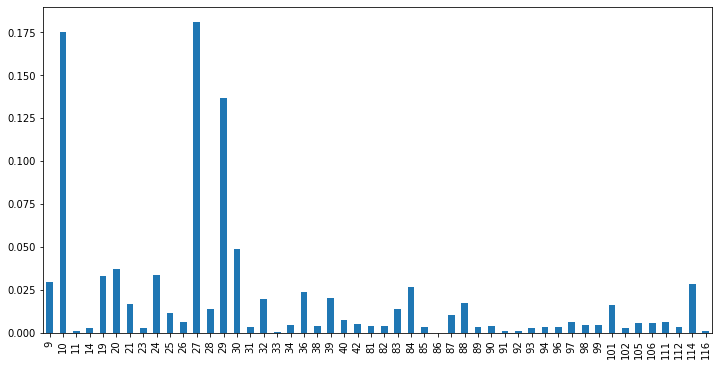

In [34]:
#диаграмма
import numpy as np
from sklearn import preprocessing
plt.figure(figsize=(12, 6))
train2['category'].value_counts(sort=False, normalize=True).plot.bar()

Дисбаланс между классами довольно высокий 

Наибольшую долю в выборке имеет класс 27 ('Одежда, обувь, аксессуары'). Доля - 0.180707

Наименьшую - 86 ('Недвижимость за рубежом'). Доля - 0.000039

### Предобработка

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vr = CountVectorizer()
matrix_train2 = vr.fit_transform(train2['entire_text'])
matrix_train2

<4234042x2125805 sparse matrix of type '<class 'numpy.int64'>'
	with 150918485 stored elements in Compressed Sparse Row format>

Матрица получилась очень большой ввиду низкого качества словаря. Проверим, как много в словаре слов, начинающихся с цифр или символов

In [16]:
df = pd.DataFrame(list(vr.vocabulary_.items()), columns=['Word','Feature Index'])
df['1digit']=df['Word'].str[0]
df

,Word,Feature Index,1digit
0,эбу,2102181,э
1,renault,983123,r
2,nissan,927024,n
3,dci,737115,d
4,delphi,739000,d
...,...,...,...
2125800,594г,444747,5
2125801,мотоланд,1567516,м
2125802,падавший,1687876,п
2125803,стоковою,1943040,с


In [17]:
#Количество слов, начинающихся с цифры
sum(map(lambda x: x.isdigit(),df['1digit']))

610944

In [18]:
#Количество слов, начинающихся с символа пунктуации
import string
sum(map(lambda x: x in string.punctuation,df['1digit']))

2043

Пишем кастомный токенайзер, которые сделает все, что нам нужно: 
0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Работа функии продемонстрирована на самом первом описании товара в датасете.

In [30]:
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stemmer = SnowballStemmer('russian')

def custom_tokenizer(sample):
    sample = [stemmer.stem(word) for word in word_tokenize(sample.lower()) if not word in stopwords.words('russian') and word.isalpha()]
    return sample
custom_tokenizer(train2['entire_text'][0])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vasilisavashenko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vasilisavashenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

## Обучение

Мы попробуем сравнить качество предсказания при использования трех разных векторайзеров: CountVectorizer, TF-IDF Vectorizer и HashingVectorizer. 

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [51]:
vr2 = CountVectorizer(tokenizer = custom_tokenizer)
sample = train2.sample(100000) 
X = vr2.fit_transform(sample['entire_text'])
y = sample["category"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model1 = SGDClassifier().fit(X_train,y_train)
preds = model1.predict(X_test)

In [55]:
X

<100000x83702 sparse matrix of type '<class 'numpy.int64'>'
	with 2472186 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test,preds)
accuracy1

0.82535

In [62]:
### поскольку очень частые слова имеют низкую дискриминирующю силу для предсказания
### мы устанавливаем порог на частоту появления токенов
vr3 = TfidfVectorizer(tokenizer = custom_tokenizer, max_df = 0.9)
sample = train2.sample(100000) 
X = vr3.fit_transform(sample['entire_text'])
y = sample['category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model2 = SGDClassifier().fit(X_train,y_train)
preds2 = model2.predict(X_test)

In [63]:
X

<100000x84106 sparse matrix of type '<class 'numpy.float64'>'
	with 2455267 stored elements in Compressed Sparse Row format>

In [64]:
accuracy2 = accuracy_score(y_test,preds2)
accuracy2

0.82585

Попробуем применить hashing trick: случайно группируем признаки складываем их, а потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. При таком подходе не нужно хранить словарь token->index, что тоже иногда полезно.

In [68]:
vr4 = HashingVectorizer(n_features=30000)
sample = train2.sample(100000) 
X = vr4.fit_transform(sample['entire_text'])
y = sample['category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model3 = SGDClassifier().fit(X_train,y_train)
preds3 = model3.predict(X_test)

In [69]:
X

<100000x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 3558976 stored elements in Compressed Sparse Row format>

In [71]:
accuracy3 = accuracy_score(y_test,preds3)
accuracy3

0.8138

Вывод: в качестве baseline модели выбирается модель №2, задействующая TfidfVectorizer, поскольку она показала наилучшее качество на тестовой выборке.